# Projeto de Análise de Desempenho da Turma em Cálculo 1 - UnB

## Resumo do Projeto:

Este notebook tem como objetivo documentar o projeto de análise de desempenho da turma na disciplina de Cálculo 1 na Universidade de Brasília (UnB) com foco em nove módulos de revisão de Matemática Básica. Utilizarei a linguagem de programação Python para coletar, processar e analisar os dados relacionados ao desempenho dos alunos. O projeto visa extrair insights valiosos que possam contribuir para a melhoria do ensino e do aprendizado na universidade.
            
            - Módulo 1: Frações                            - Módulo 6: Expr. polinominais
            - Módulo 2: Potenciação                        - Módulo 7: Div. de polinomios
            - Módulo 3: Radiciação                         - Módulo 8: Fatoração
            - Módulo 4: Expr. numéricas                    - Módulo 9: Funções Racionais
            - Módulo 5: Expr. algébricas

No arquivo que contém os dados, que por sua vez estão desorganizados, resolvi separar em partes para melhor organização. A primeira parte tem pouco mais de 32 matriculas com suas respectivas notas.

In [5]:
with open("c1.txt") as file:
    lfile = []
    for line in file:
        lfile.append(line)
    
    frstab = []
    for mat in lfile[1:38]:
        frstab.append(mat)

Finalizando e limpando a primeira leva de dados, adicionei cada matricula em um dicionário com o valor sendo uma lista das suas notas em respectivos módulos

In [6]:
alunos = {}
for line in frstab:
    matricula = int(line[0:9])
    notas = line[10:27].split(" ")
    
    alunos[matricula] = notas
    
    if alunos[matricula][0] == '':
        del alunos[matricula]
len(alunos)

33

Nessa segunda leva de dados, conseguir organiza-los juntando cada aluno em unica lista com sua matrícula e respectivas notas e ultilizando list comprehension para remover o último caractere, que estava como "\n", de cada elemento.

In [9]:
stab = lfile[38:]
for pos in range(len(stab)):
    if len(stab[pos]) > 2 and len(stab[pos+1]) <= 2:
        aluno = []
        for i in range(10):
            aluno.append(stab[pos+i])
        
        aluno = [elemento[:-1] if elemento.endswith("\n") else elemento for elemento in aluno]
        
        alunos[int(aluno[0])] = aluno[1:]
    else:
        continue
print(len(alunos))
alunos

68


{232007956: ['A', 'A', 'B', 'B', 'A', 'A', 'A', 'B', 'B'],
 232000712: ['C', 'B', 'C', 'B', 'B', 'B', 'C', 'C', 'C'],
 232000703: ['B', 'C', 'A', 'B', 'B', 'A', 'C', 'C', 'C'],
 232014360: ['C', 'C', 'C', 'C', 'C', 'B', 'B', 'C', 'C'],
 221007635: ['B', 'A', 'C', 'A', 'B', 'A', 'C', 'C', 'A'],
 231000530: ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C'],
 232014370: ['B', 'B', 'C', 'B', 'C', 'B', 'B', 'C', 'C'],
 232000721: ['B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C'],
 232013917: ['B', 'A', 'A', 'B', 'A', 'A', 'C', 'B', 'C'],
 232013926: ['A', 'A', 'B', 'A', 'A', 'A', 'C', 'C', 'A'],
 232014389: ['B', 'A', 'A', 'A', 'B', 'A', 'A', 'C', 'B'],
 232024966: ['A', 'C', 'C', 'C', 'C', 'A', 'C', 'B', 'C'],
 232001120: ['B', 'C', 'C', 'C', 'C', 'B', 'C', 'C', 'C'],
 232001148: ['B', 'C', 'C', 'C', 'C', 'A', 'C', 'B', 'C'],
 232014398: ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C'],
 231011159: ['B', 'C', 'C', 'C', 'B', 'A', 'B', 'C', 'C'],
 232001139: ['B', 'C', 'A', 'C', 'B', 'B', 'C', 'C', 'B'

##### No proxímo bloco importei a biblioteca pandas para melhor trabalho com o dados.

In [14]:
import pandas as pd

df = pd.DataFrame(alunos, index=["M1","M2","M3","M4","M5","M6","M7","M8","M9"]).transpose()
df

,M1,M2,M3,M4,M5,M6,M7,M8,M9
232007956,A,A,B,B,A,A,A,B,B
232000712,C,B,C,B,B,B,C,C,C
232000703,B,C,A,B,B,A,C,C,C
232014360,C,C,C,C,C,B,B,C,C
221007635,B,A,C,A,B,A,C,C,A
...,...,...,...,...,...,...,...,...,...
231012254,B,C,C,C,C,A,C,C,C
221008202,B,C,C,C,A,A,C,A,C
222031448,B,C,C,C,C,C,B,C,C
232021795,C,C,C,C,B,C,C,C,C


Como os dados são do tipo char, para melhor compreensão e facilitar operações converti os dados para tipo numérico.

In [15]:
notasMap = {"A": 10, "B": 5, "C": 0}

dfnum = df.replace(notasMap)
dfnum

,M1,M2,M3,M4,M5,M6,M7,M8,M9
232007956,10,10,5,5,10,10,10,5,5
232000712,0,5,0,5,5,5,0,0,0
232000703,5,0,10,5,5,10,0,0,0
232014360,0,0,0,0,0,5,5,0,0
221007635,5,10,0,10,5,10,0,0,10
...,...,...,...,...,...,...,...,...,...
231012254,5,0,0,0,0,10,0,0,0
221008202,5,0,0,0,10,10,0,10,0
222031448,5,0,0,0,0,0,5,0,0
232021795,0,0,0,0,5,0,0,0,0


In [16]:
#Cálculo do media de cada módulo
media = dfnum.mean()

M1    5.220588
M2    3.602941
M3    3.455882
M4    2.573529
M5    3.897059
M6    6.029412
M7    2.132353
M8    1.985294
M9    2.132353
dtype: float64

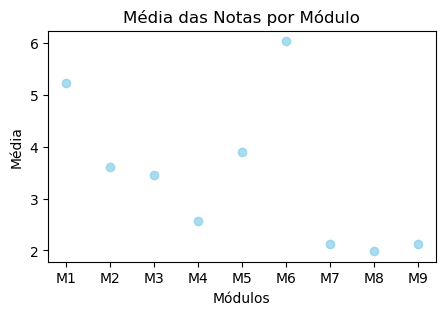

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.scatter(media.index, media.values, color='skyblue', alpha=0.7)
plt.title('Média das Notas por Módulo')
plt.xlabel('Módulos')
plt.ylabel('Média')

plt.show()

Com esse gráfico, criado ultilizando a biblioteca Matplotlib, podemos criar um primeiro insight: Os módulos 7, 8, 9 foram que tiveram as menores médias então pode-se afirmar que os alunos em média tem mais dificuldade nesses módulos. Em contrapartida, o módulo 6 foi o que teve a maior média, confirmando que expressões polinominais é o assunto que os alunos tem mais facilidade entre os demais.

Podemos também verificar a correlação entre os módulos para determinar se existem módulos que estão mais fortemente correlacionados, o que pode indicar que os alunos que se saem bem em um módulo também tendem a se sair bem em outro.

In [21]:
correlacao = dfnum.corr()
correlacao

,M1,M2,M3,M4,M5,M6,M7,M8,M9
M1,1.000000,0.531516,0.408741,0.407681,0.435563,0.651806,0.424403,0.507889,0.427773
M2,0.531516,1.000000,0.548002,0.738658,0.560704,0.436238,0.409464,0.258129,0.514405
M3,0.408741,0.548002,1.000000,0.535621,0.497296,0.361883,0.332543,0.152684,0.265412
M4,0.407681,0.738658,0.535621,1.000000,0.679280,0.427012,0.282428,0.221912,0.504717
M5,0.435563,0.560704,0.497296,0.679280,1.000000,0.472246,0.205536,0.370192,0.456243
M6,0.651806,0.436238,0.361883,0.427012,0.472246,1.000000,0.377962,0.458271,0.334475
M7,0.424403,0.409464,0.332543,0.282428,0.205536,0.377962,1.000000,0.255609,0.336443
M8,0.507889,0.258129,0.152684,0.221912,0.370192,0.458271,0.255609,1.000000,0.337941
M9,0.427773,0.514405,0.265412,0.504717,0.456243,0.334475,0.336443,0.337941,1.000000


Para mehor visualização da matriz de correlação irei ultilizar um mapa de calor ultilizando a biblioteca seaborn

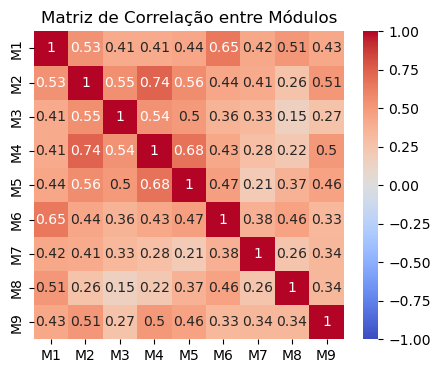

In [24]:
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre Módulos')
plt.show()